

# Initial Setup



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np

# Set the seed for random operations. 
# Letting experiments to be reproducible. 
SEED = 1234
tf.random.set_seed(SEED) 
np.random.seed(SEED)

# Get current working directory
cwd = os.getcwd()

In [3]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Dec 12 11:31:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Dataset Retrieval

In [5]:
# Option to set to true the first time to RETRIEVE the dataset and create the
# folder structure. If set to false it expects the dataset to be already 
# splitted and zipped in your drive in the directory "Challenge_2".
SPLIT_DATASET = False

# This option let you use your dataset_split.json file, that must be located in 
# your drive in the directory "Challenge_2", for the dataset split.
# Is considered only if SPLIT_DATASET == True since if SPLIT_DATASET == 
# False the dataset is expected to be already splitted and zipped in your
# drive in the directory "Challenge_2".
LOAD_FROM_JSON = False

### Cells executed if: SPLIT_DATASET = True 

In [6]:
if SPLIT_DATASET == True:
  ! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset.zip'

In [7]:
# -----------------------------
# Create the dataset_split.json 
# -----------------------------
if SPLIT_DATASET == True and LOAD_FROM_JSON == False:

  from PIL import Image
  import json
  
  VALIDATION_SPLIT = 0.15

  split = {}
  split['training'] = {}
  split['validation'] = {}

  teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
  plants = ['Haricot', 'Mais']

  # Random seed for reproducibility
  np.random.seed(SEED)

  for t in teams:

    split['training'][t] = {}
    split['validation'][t] = {}

    for p in plants:

      split['training'][t][p] = []      
      split['validation'][t][p] = []

      image_filenames = os.listdir('/content/Development_Dataset/Training/' + t + '/' + p + '/' + 'Images')
      # Order images files to get always the same split
      image_filenames = sorted(image_filenames)
          
      # Create training split
      for i in range(int(len(image_filenames) * (1 - VALIDATION_SPLIT))):
        image_name = image_filenames[i].split('.')
        split['training'][t][p].append(image_name)

      
      # Create validation split
      for j in range(i + 1, len(image_filenames)):
        image_name = image_filenames[j].split('.')
        split['validation'][t][p].append(image_name)

  with open(os.path.join(cwd, 'dataset_split.json'), 'w') as f:
    json.dump(split, f)

  ! cp '/content/dataset_split.json' '/content/drive/My Drive/Challenge_2/dataset_split.json'

In [8]:
# ------------------------------------------
# Create the splitted dataset directory tree 
# ------------------------------------------
if SPLIT_DATASET == True:
  import shutil
  
  # Use your dataset_split.json 
  # ---------------------------
  if LOAD_FROM_JSON == True:
    import json
    f = open('/content/drive/My Drive/Challenge_2/dataset_split.json')
    split = json.load(f) 
    ! cp '/content/drive/My Drive/Challenge_2/dataset_split.json' '/content/dataset_split.json'  
  # ---------------------------


  # Create the folder for the splitted dataset
  # ------------------------------------------
  ! mkdir '/content/Development_Dataset_15'

  ! mkdir '/content/Development_Dataset_15/training'
  ! mkdir '/content/Development_Dataset_15/training/images'
  ! mkdir '/content/Development_Dataset_15/training/masks'

  ! mkdir '/content/Development_Dataset_15/validation'
  ! mkdir '/content/Development_Dataset_15/validation/images'
  ! mkdir '/content/Development_Dataset_15/validation/masks'
  # ------------------------------------------

  teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
  plants = ['Haricot', 'Mais']

  for t in teams:
    for p in plants:

      for img_name in split['training'][t][p]:
        
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Images', img_name[0] + '.' + img_name[1])
        dst_path = os.path.join(cwd, 'Development_Dataset_15/training/images')
        shutil.move(src_path, dst_path)

        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks', img_name[0] + '.png')
        dst_path = os.path.join(cwd, 'Development_Dataset_15/training/masks')
        shutil.move(src_path, dst_path)

      for img_name in split['validation'][t][p]:
    
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Images', img_name[0] + '.' + img_name[1])
        dst_path = os.path.join(cwd, 'Development_Dataset_15/validation/images')
        shutil.move(src_path, dst_path)
    
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks', img_name[0] + '.png')
        dst_path = os.path.join(cwd, 'Development_Dataset_15/validation/masks')
        shutil.move(src_path, dst_path)
  ! ls

In [9]:
# ------------------------------------------------------------------------------------------
# Zip the splitted dataset for the next executions, to avoid the splitting process each time
# ------------------------------------------------------------------------------------------
if SPLIT_DATASET == True:
  ! zip -r '/content/drive/My Drive/Challenge_2/Development_Dataset_15.zip' 'Development_Dataset_15'

### Cells executed if: SPLIT_DATASET = False 

In [10]:
# --------------------------------------------------------------------------------
# Unzip the json file with the split used and the splitted dataset from your drive
# --------------------------------------------------------------------------------
if SPLIT_DATASET == False:
  # Get dataset_split.json
  ! cp '/content/drive/My Drive/Challenge_2/dataset_split.json' '/content/dataset_split.json' 
  # Get the splitted dataset
  ! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset_15.zip'

Archive:  /content/drive/My Drive/Challenge_2/Development_Dataset_15.zip
replace Development_Dataset_15/validation/images/Bipbip_mais_im_05221.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_05221.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0336_false.png  
  inflating: Development_Dataset_15/validation/images/Roseau_haricot_0212_false.png  
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_01601.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0140_false.png  
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_01871.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0120_false.png  
  inflating: Development_Dataset_15/validation/images/Pead_mais_00666_i900.jpg  
  inflating: Development_Dataset_15/validation/images/Pead_mais_00615_i900.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0238_f

In [11]:
import json

subset_file = os.path.join('/content', 'dataset_split.json')
with open(subset_file, 'r') as f:
  data = json.load(f)

data


{'training': {'Bipbip': {'Haricot': [['Bipbip_haricot_im_00321', 'jpg'],
    ['Bipbip_haricot_im_00391', 'jpg'],
    ['Bipbip_haricot_im_00451', 'jpg'],
    ['Bipbip_haricot_im_00511', 'jpg'],
    ['Bipbip_haricot_im_00651', 'jpg'],
    ['Bipbip_haricot_im_00801', 'jpg'],
    ['Bipbip_haricot_im_00871', 'jpg'],
    ['Bipbip_haricot_im_01021', 'jpg'],
    ['Bipbip_haricot_im_01091', 'jpg'],
    ['Bipbip_haricot_im_01271', 'jpg'],
    ['Bipbip_haricot_im_01451', 'jpg'],
    ['Bipbip_haricot_im_01541', 'jpg'],
    ['Bipbip_haricot_im_01631', 'jpg'],
    ['Bipbip_haricot_im_01731', 'jpg'],
    ['Bipbip_haricot_im_01821', 'jpg'],
    ['Bipbip_haricot_im_01911', 'jpg'],
    ['Bipbip_haricot_im_02171', 'jpg'],
    ['Bipbip_haricot_im_02231', 'jpg'],
    ['Bipbip_haricot_im_02301', 'jpg'],
    ['Bipbip_haricot_im_02351', 'jpg'],
    ['Bipbip_haricot_im_02531', 'jpg'],
    ['Bipbip_haricot_im_02651', 'jpg'],
    ['Bipbip_haricot_im_03041', 'jpg'],
    ['Bipbip_haricot_im_03111', 'jpg'],
    ['B

# Dataset Setup

In [12]:
# --------------------------------------------------------------------------------------
# Create the training and validation ImageDataGenerator objects for from scratch network
# --------------------------------------------------------------------------------------
def data_generator(apply_data_augmentation):

  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  apply_data_augmentation = True

  # Create training ImageDataGenerator object
  # We need two different generators for images and corresponding masks
  if apply_data_augmentation:
    img_data_gen = ImageDataGenerator(rotation_range=10,
                                      width_shift_range=10,
                                      height_shift_range=10,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='reflect'
                                      )

    mask_data_gen = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=10,
                                       height_shift_range=10,
                                       zoom_range=0.3,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       fill_mode='reflect')
    
  return img_data_gen, mask_data_gen

In [13]:
# --------------------------------
# Create the class for the dataset
# --------------------------------

from PIL import Image

class CustomDataset(tf.keras.utils.Sequence):

  """
    CustomDataset inheriting from tf.keras.utils.Sequence.

    3 main methods:
      - __init__: save dataset params like directory, filenames..
      - __len__: return the total number of samples in the dataset
      - __getitem__: return a sample from the dataset

    Note: 
      - the custom dataset return a single sample from the dataset. Then, we use 
        a tf.data.Dataset object to group samples into batches.
      - in this case we have a different structure of the dataset in memory. 
        We have all the images in the same folder and the training and validation splits
        are defined in text files.

  """

  def __init__(self, dataset_dir, which_subset, img_generator=None, mask_generator=None, 
               preprocessing_function=None, out_shape=[500, 500]):
    import json
    
    subset_file = os.path.join('/content', 'dataset_split.json')
    with open(subset_file, 'r') as f:
      split = json.load(f)
    
    teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
    plants = ['Haricot', 'Mais']
    
    subset_filenames = []
    
    for t in teams:
      for p in plants:
        
        for img_name in split[which_subset][t][p]:
          subset_filenames.append(img_name) 

    self.which_subset = which_subset
    self.dataset_dir = dataset_dir
    self.subset_filenames = subset_filenames
    self.img_generator = img_generator
    self.mask_generator = mask_generator
    self.preprocessing_function = preprocessing_function
    self.out_shape = out_shape

  def __len__(self):
    return len(self.subset_filenames)

  def __getitem__(self, index):
    # Read Image
    curr_filename = self.subset_filenames[index]
    img = Image.open(os.path.join(self.dataset_dir, self.which_subset, 'images', curr_filename[0] + '.' + curr_filename[1]))
    mask = Image.open(os.path.join(self.dataset_dir, self.which_subset, 'masks', curr_filename[0] + '.png'))   

    # Resize image and mask
    img = img.resize(self.out_shape) #size – The requested size in pixels, as a 2-tuple: (width, height). !!!!!!!!!!! ATTENTION !!!!!!!!!
    mask = mask.resize(self.out_shape, resample=Image.NEAREST) 

    img_arr = np.array(img)
    mask_arr = np.array(mask)
    
    # RGB to target
    # -------------
    new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    new_mask_arr[np.where(np.all(mask_arr == [0, 0, 0], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [254, 124, 18], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
    new_mask_arr[np.where(np.all(mask_arr == [254, 67, 82], axis=-1))] = 2

    mask_arr = np.expand_dims(new_mask_arr, -1)
    # -------------

    # in this dataset 255 mask label is assigned to an additional class, which corresponds 
    # to the contours of the objects. We remove it for simplicity.
    #mask_arr[mask_arr == 255] = 0  

    if self.which_subset == 'training':
      if self.img_generator is not None and self.mask_generator is not None:
        # Perform data augmentation
        # We can get a random transformation from the ImageDataGenerator using get_random_transform
        # and we can apply it to the image using apply_transform
        img_t = self.img_generator.get_random_transform(img_arr.shape, seed=SEED)
        mask_t = self.mask_generator.get_random_transform(mask_arr.shape, seed=SEED)
        img_arr = self.img_generator.apply_transform(img_arr, img_t)
        # ImageDataGenerator use bilinear interpolation for augmenting the images.
        # Thus, when applied to the masks it will output 'interpolated classes', which
        # is an unwanted behaviour. As a trick, we can transform each class mask 
        # separately and then we can cast to integer values (as in the binary segmentation notebook).
        # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
        out_mask = np.zeros_like(mask_arr)
        for c in np.unique(mask_arr):
          if c > 0:
            curr_class_arr = np.float32(mask_arr == c)
            curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, mask_t)
            # from [0, 1] to {0, 1}
            curr_class_arr = np.uint8(curr_class_arr)
            # recover original class
            curr_class_arr = curr_class_arr * c 
            out_mask += curr_class_arr
    else:
      out_mask = mask_arr
    
    if self.preprocessing_function is not None:
        img_arr = self.preprocessing_function(img_arr)

    return img_arr, np.float32(out_mask)

In [14]:
# ------------------------------------------------------------------
# Create train and validation dataset objects using the custom class
# ------------------------------------------------------------------
def create_dataset(img_data_gen, mask_data_gen, img_h, img_w, bs, num_classes):

  # Training
  # --------
  dataset = CustomDataset('/content/Development_Dataset_15',
                          'training', 
                          img_generator=img_data_gen, 
                          mask_generator=mask_data_gen,
                          out_shape=[img_w, img_h] # size – The requested size in pixels, as a 2-tuple: (width, height).
                          )
  
  train_dataset = tf.data.Dataset.from_generator(lambda: dataset,
                                                 output_types=(tf.float32, tf.float32),
                                                 output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
  train_dataset = train_dataset.batch(bs)

  train_dataset = train_dataset.repeat()
  # --------

  # Validation
  # ----------
  dataset_valid = CustomDataset('/content/Development_Dataset_15',
                               'validation',
                               out_shape=[img_w, img_h] # size – The requested size in pixels, as a 2-tuple: (width, height).
                               )
   
  valid_dataset = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                                 output_types=(tf.float32, tf.float32),
                                                 output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
  valid_dataset = valid_dataset.batch(bs)

  valid_dataset = valid_dataset.repeat()
  # ----------

  return train_dataset, dataset, valid_dataset, dataset_valid

# Data generator test

In [15]:
# Let's test data generator
# -------------------------

apply_data_augmentation = True

tmp_img_h = 368
tmp_img_w = 512

[img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)

[train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = tmp_img_h, img_w = tmp_img_w, bs = 8, num_classes = 3)

import time
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

# Assign a color to each class
evenly_spaced_interval = np.linspace(0, 1, 3)
colors = [cm.rainbow(x) for x in evenly_spaced_interval]

iterator = iter(train_dataset)

In [16]:
augmented_img, target = next(iterator)
augmented_img.shape

TensorShape([8, 368, 512, 3])

[0. 1.]


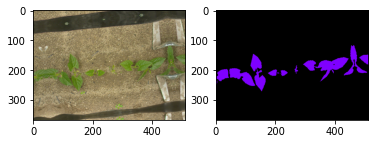

'\naugmented_img, target = next(iterator)\n\nrgb_img = cv2.imread(\'/content/Development_Dataset_15/training/images/Pead_mais_00070_i900.jpg\', cv2.IMREAD_UNCHANGED)  # open image\nproper_h = 384\nproper_w = 512\n    # resize to see how it works with kernels\n\n    # get exgreen\nexgr = None\nexgr_mask = None\nexgr = exgreen(rgb_img)\nprint("Exgr shape: ", exgr.shape)\n\nexgr_mask = thresh(exgr, 50)\n#exgr.resize([proper_h, proper_w, 3])\nim_gray_plt(exgr)\nim_gray_plt(exgr_mask)\n'

In [17]:
fig, ax = plt.subplots(1, 2)

augmented_img = augmented_img[0]   # First element
augmented_img = augmented_img  # denormalize

target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))

target_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()


'''
augmented_img, target = next(iterator)

rgb_img = cv2.imread('/content/Development_Dataset_15/training/images/Pead_mais_00070_i900.jpg', cv2.IMREAD_UNCHANGED)  # open image
proper_h = 384
proper_w = 512
    # resize to see how it works with kernels

    # get exgreen
exgr = None
exgr_mask = None
exgr = exgreen(rgb_img)
print("Exgr shape: ", exgr.shape)

exgr_mask = thresh(exgr, 50)
#exgr.resize([proper_h, proper_w, 3])
im_gray_plt(exgr)
im_gray_plt(exgr_mask)
'''

# Model setup

In [41]:
def ConvolutionLayer(input, filters, kernel_size, strides, padding):

  conv = tf.keras.layers.Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding = padding, kernel_initializer = 'he_uniform')(input)
  bn = tf.keras.layers.BatchNormalization(momentum=0.9)(conv)
  out = tf.keras.layers.ELU()(bn)
  
  return out

In [42]:
def ResidualBlock(input):
  conv1 = ConvolutionLayer(input = input, filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same')
  conv2 = ConvolutionLayer(input = conv1, filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same')
  conv3 = ConvolutionLayer(input = conv2, filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same')
  conv4 = ConvolutionLayer(input = conv3, filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same')
  out = tf.keras.layers.Add()([conv4, input])

  return out

In [43]:
def define_new_bonnet(input_size = (384, 512, 3)):

  inputs = tf.keras.Input(input_size)

  conv = ConvolutionLayer(input = inputs, filters = 16, kernel_size = (5, 5), strides = (1, 1), padding = 'same')

  # -------
  # Encoder
  # -------

  # Residual block 1
  residual1 = ResidualBlock(conv)

  # Residual block 2
  residual2 = ResidualBlock(residual1)

  # Residual block 3
  residual3 = ResidualBlock(residual2)

  # Pooling 1
  pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(residual3)

  # Residual block 4
  residual4 = ResidualBlock(pool1)

  # Residual block 5
  residual5 = ResidualBlock(residual4)

  # Residual block 6
  residual6 = ResidualBlock(residual5)

  # Pooling 2
  pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(residual6)

  # Residual block 7
  residual7 = ResidualBlock(pool2)

  # Residual block 8
  residual8 = ResidualBlock(residual7)

  # Residual block 9
  residual9 = ResidualBlock(residual8)

  # Pooling 3
  pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(residual9)

  # Residual block 10
  residual10 = ResidualBlock(pool3)

  # Residual block 11
  residual11 = ResidualBlock(residual10)

  # Residual block 12
  residual12 = ResidualBlock(residual11)

  # Pooling 4
  pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(residual11)

  # -------

  # -------
  # Decoder
  # -------

  # Unpooling with shared indexes
  unpool1 = tf.keras.layers.Conv2DTranspose(filters = pool4.shape[-1], kernel_size = (2, 2), strides=(2, 2), padding='same')(pool4)

  # Residual block 13
  residual13 = ResidualBlock(unpool1)

  # Residual block 14
  residual14 = ResidualBlock(residual13)

  # Residual block 15
  residual15 = ResidualBlock(residual14)

  # Unpooling with shared indexes
  unpool2 = tf.keras.layers.Conv2DTranspose(filters = residual15.shape[-1], kernel_size = (2, 2), strides=(2, 2), padding='same')(residual15)

  # Residual block 16
  residual16 = ResidualBlock(unpool2)

  # Residual block 17
  residual17 = ResidualBlock(residual16)

  # Residual block 18
  residual18 = ResidualBlock(residual17)

  # Unpooling with shared indexes
  unpool3 = tf.keras.layers.Conv2DTranspose(filters = residual18.shape[-1], kernel_size = (2, 2), strides=(2, 2), padding='same')(residual18)

  # Residual block 19
  residual19 = ResidualBlock(unpool3)

  # Residual block 20
  residual20 = ResidualBlock(residual19)

  # Residual block 21
  residual21 = ResidualBlock(residual20)

  # Unpooling with shared indexes
  unpool4 = tf.keras.layers.Conv2DTranspose(filters = residual21.shape[-1], kernel_size = (2, 2), strides=(2, 2), padding='same')(residual21)

  # Residual block 22
  residual22 = ResidualBlock(unpool4)

  # Residual block 23
  residual23 = ResidualBlock(residual22)

  # Residual block 24
  residual24 = ResidualBlock(residual23)

  # CONV(1,1) with 3 kernels
  out = tf.keras.layers.Conv2D(filters = 3, # only 1 output neuron since the classification is binary: output => 0 == background, 1 == object
                               kernel_size = (1, 1), # => FC layer convolutionalized
                               strides = (1, 1), # stride of a FC layer
                               padding = 'same', # or same: kernel is (1,1) and stride (1,1) so is not important
                               activation='softmax')(residual24)

  model = tf.keras.Model(inputs = inputs, outputs = out)

  # Visualize created model as a table
  model.summary()

  return model

In [44]:
# ---------------------------------------------------
# Define the bonnet model (without transfer learning)
# ---------------------------------------------------
def define_bonnet(input_size = (384, 512, 3)):

    inputs = tf.keras.Input(input_size)

    conv1 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), strides = (1, 1), padding = 'same')(inputs)
    bn1 = tf.keras.layers.BatchNormalization(momentum=0.9)(conv1)
    out1 = tf.keras.layers.ReLU()(bn1)

    # Downsampling
    # ------------

    # Residual block 1
    b1_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(out1)
    b1_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b1_conv1)
    b1_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b1_conv2)
    b1_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b1_conv3)
    rout1 = tf.keras.layers.Add()([b1_conv4, out1])

    # Residual block 2
    b2_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout1)
    b2_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b2_conv1)
    b2_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b2_conv2)
    b2_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b2_conv3)
    rout2 = tf.keras.layers.Add()([b2_conv4, rout1])

    # Residual block 3
    b3_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout2)
    b3_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b3_conv1)
    b3_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b3_conv2)
    b3_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b3_conv3)
    rout3 = tf.keras.layers.Add()([b3_conv4, rout2])

    # Pooling 1
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(rout3)

    # Residual block 4
    b4_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(pool1)
    b4_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b4_conv1)
    b4_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b4_conv2)
    b4_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b4_conv3)
    rout4 = tf.keras.layers.Add()([b4_conv4, pool1])

    # Residual block 5
    b5_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout4)
    b5_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b5_conv1)
    b5_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b5_conv2)
    b5_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b5_conv3)
    rout5 = tf.keras.layers.Add()([b5_conv4, rout4])

    # Residual block 6
    b6_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout5)
    b6_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b6_conv1)
    b6_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b6_conv2)
    b6_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b6_conv3)
    rout6 = tf.keras.layers.Add()([b6_conv4, rout5])

    # Pooling 2
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(rout6)

    # Residual block 7
    b7_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(pool2)
    b7_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b7_conv1)
    b7_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b7_conv2)
    b7_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b7_conv3)
    rout7 = tf.keras.layers.Add()([b7_conv4, pool2])

    # Residual block 8
    b8_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout7)
    b8_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b8_conv1)
    b8_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b8_conv2)
    b8_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b8_conv3)
    rout8 = tf.keras.layers.Add()([b8_conv4, rout7])

    # Residual block 9
    b9_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout8)
    b9_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b9_conv1)
    b9_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b9_conv2)
    b9_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b9_conv3)
    rout9 = tf.keras.layers.Add()([b9_conv4, rout8])

    # Pooling 3
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(rout9)

    # Residual block 10
    b10_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(pool3)
    b10_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b10_conv1)
    b10_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b10_conv2)
    b10_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b10_conv3)
    rout10 = tf.keras.layers.Add()([b10_conv4, pool3])

    # Residual block 11
    b11_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout10)
    b11_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b11_conv1)
    b11_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b11_conv2)
    b11_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b11_conv3)
    rout11 = tf.keras.layers.Add()([b11_conv4, rout10])

    # Residual block 12
    b12_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout11)
    b12_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b12_conv1)
    b12_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b12_conv2)
    b12_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b12_conv3)
    rout12 = tf.keras.layers.Add()([b12_conv4, rout11])

    # Pooling 4
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(rout12)

    #-----------------------------------------------

    # Decoder
    # -------

    # Unpooling with shared indexes
    unpool1 = tf.keras.layers.UpSampling2D()(pool4)

    # Residual block 13
    b13_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(unpool1)
    b13_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b13_conv1)
    b13_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b13_conv2)
    b13_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b13_conv3)
    rout13 = tf.keras.layers.Add()([b13_conv4, unpool1])

    # Residual block 14
    b14_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout13)
    b14_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b14_conv1)
    b14_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b14_conv2)
    b14_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b14_conv3)
    rout14 = tf.keras.layers.Add()([b14_conv4, rout13])

    # Residual block 15
    b15_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout14)
    b15_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b15_conv1)
    b15_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b15_conv2)
    b15_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b15_conv3)
    rout15 = tf.keras.layers.Add()([b15_conv4, rout14])

    # Unpooling with shared indexes
    unpool2 = tf.keras.layers.UpSampling2D()(rout15)

    # Residual block 16
    b16_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(unpool2)
    b16_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b16_conv1)
    b16_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b16_conv2)
    b16_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b16_conv3)
    rout16 = tf.keras.layers.Add()([b16_conv4, unpool2])

    # Residual block 17
    b17_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout16)
    b17_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b17_conv1)
    b17_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b17_conv2)
    b17_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b17_conv3)
    rout17 = tf.keras.layers.Add()([b17_conv4, rout16])

    # Residual block 18
    b18_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout17)
    b18_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b18_conv1)
    b18_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b18_conv2)
    b18_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b18_conv3)
    rout18 = tf.keras.layers.Add()([b18_conv4, rout17])

    # Unpooling with shared indexes
    unpool3 = tf.keras.layers.UpSampling2D()(rout18)

    # Residual block 19
    b19_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(unpool3)
    b19_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b19_conv1)
    b19_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b19_conv2)
    b19_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b19_conv3)
    rout19 = tf.keras.layers.Add()([b19_conv4, unpool3])

    # Residual block 20
    b20_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout19)
    b20_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b20_conv1)
    b20_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b20_conv2)
    b20_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b20_conv3)
    rout20 = tf.keras.layers.Add()([b20_conv4, rout19])

    # Residual block 21
    b21_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout20)
    b21_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b20_conv1)
    b21_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b20_conv2)
    b21_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b20_conv3)
    rout21 = tf.keras.layers.Add()([b21_conv4, rout20])

    # Unpooling with shared indexes
    unpool4 = tf.keras.layers.UpSampling2D()(rout21)

    # Residual block 22
    b22_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(unpool4)
    b22_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b22_conv1)
    b22_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b22_conv2)
    b22_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b22_conv3)
    rout22 = tf.keras.layers.Add()([b22_conv4, unpool4])

    # Residual block 23
    b23_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout22)
    b23_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b23_conv1)
    b23_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b23_conv2)
    b23_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b23_conv3)
    rout23 = tf.keras.layers.Add()([b23_conv4, rout22])

    # Residual block 24
    b24_conv1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(rout23)
    b24_conv2 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (5, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b24_conv1)
    b24_conv3 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (1, 5), strides = (1, 1), padding = 'same', activation = 'relu')(b24_conv2)
    b24_conv4 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu')(b24_conv3)
    rout24 = tf.keras.layers.Add()([b24_conv4, rout23])

    # CONV(1,1) with 3 kernels
    out = tf.keras.layers.Conv2D(filters = 3, # only 1 output neuron since the classification is binary: output => 0 == background, 1 == object
                                 kernel_size = (1, 1), # => FC layer convolutionalized
                                 strides = (1, 1), # stride of a FC layer
                                 padding = 'same', # or same: kernel is (1,1) and stride (1,1) so is not important
                                 activation='softmax')(rout24)

    model = tf.keras.Model(inputs = inputs, outputs = out)

    # Visualize created model as a table
    model.summary()

    return model

In [45]:
# -----------------------------------------------------------------
# Define the model created from scratch (without transfer learning)
# -----------------------------------------------------------------
def define_model(depth, start_f, num_classes, dynamic_input_shape, img_h, img_w):

    model = tf.keras.Sequential()
    
    # Encoder
    # -------
    for i in range(depth):
        
        if i == 0:
            if dynamic_input_shape:
                input_shape = [None, None, 3]
            else:
                input_shape = [img_h, img_w, 3]
        else:
            input_shape=[None]
        
        model.add(tf.keras.layers.Conv2D(filters=start_f, 
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same',
                                         input_shape=input_shape))
        model.add(tf.keras.layers.ReLU())
        model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

        start_f *= 2

    # Bottleneck => does not have pooling
    model.add(tf.keras.layers.Conv2D(filters=start_f, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(tf.keras.layers.ReLU())
    
    start_f = start_f // 2 # Start to decrease the number of features
        
    # Decoder: recover details
    # -------
    for i in range(depth):
        model.add(tf.keras.layers.UpSampling2D(2, interpolation='bilinear')) # 2 means that double the input dimension
        # Now conv + ReLU transform the upsampled features into dense features
        model.add(tf.keras.layers.Conv2D(filters=start_f,
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same'))
        model.add(tf.keras.layers.ReLU())

        start_f = start_f // 2

    # Prediction Layer i.e. classification layer => FC layer convolutionalized
    # ----------------
    model.add(tf.keras.layers.Conv2D(filters=num_classes, # only 1 output neuron since the classification is binary: output => 0 == background, 1 == object
                                     kernel_size=(1, 1), # => FC layer convolutionalized
                                     strides=(1, 1), # stride of a FC layer
                                     padding='same', # or same: kernel is (1,1) and stride (1,1) so is not important
                                     activation='softmax'))
    
    # Visualize created model as a table
    model.summary()

    return model

In [46]:
# -------------------------------------------------
# Define the unet model (without transfer learning)
# -------------------------------------------------
def define_unet(pretrained_weights, input_size):

    inputs = tf.keras.Input(input_size)

    conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = tf.keras.layers.Dropout(0.5)(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = tf.keras.layers.Dropout(0.5)(conv5)

    up6 = tf.keras.layers.Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(drop5))
    merge6 = tf.keras.layers.concatenate([drop4,up6], axis = 3)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = tf.keras.layers.Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(conv6))
    merge7 = tf.keras.layers.concatenate([conv3,up7], axis = 3)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = tf.keras.layers.Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(conv7))
    merge8 = tf.keras.layers.concatenate([conv2,up8], axis = 3)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = tf.keras.layers.Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(conv8))
    merge9 = tf.keras.layers.concatenate([conv1,up9], axis = 3)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = tf.keras.layers.Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    conv10 = tf.keras.layers.Conv2D(filters = 3, # only 1 output neuron since the classification is binary: output => 0 == background, 1 == object
                                    kernel_size = (1, 1), # => FC layer convolutionalized
                                    strides = (1, 1), # stride of a FC layer
                                    padding = 'same', # or same: kernel is (1,1) and stride (1,1) so is not important
                                    activation='softmax')(conv9)

    model = tf.keras.Model(inputs = inputs, outputs = conv10)

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    # Visualize created model as a table
    model.summary()

    return model

In [47]:
import keras
from keras.models import *
from keras.layers import *
from keras import layers

IMAGE_ORDERING = 'channels_last'

if IMAGE_ORDERING == 'channels_first':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.2/" \
                     "resnet50_weights_th_dim_ordering_th_kernels_notop.h5"
elif IMAGE_ORDERING == 'channels_last':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.2/" \
                     "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"


def one_side_pad(x):
    x = ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING)(x)
    if IMAGE_ORDERING == 'channels_first':
        x = Lambda(lambda x: x[:, :, :-1, :-1])(x)
    elif IMAGE_ORDERING == 'channels_last':
        x = Lambda(lambda x: x[:, :-1, :-1, :])(x)
    return x


def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at
                     main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters

    if IMAGE_ORDERING == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), data_format=IMAGE_ORDERING,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, data_format=IMAGE_ORDERING,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), data_format=IMAGE_ORDERING,
               name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor, kernel_size, filters, stage, block,
               strides=(2, 2)):
    """conv_block is the block that has a conv layer at shortcut
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at
                     main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    Note that from stage 3, the first conv layer at main path is with
    strides=(2,2) and the shortcut should have strides=(2,2) as well
    """
    filters1, filters2, filters3 = filters

    if IMAGE_ORDERING == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), data_format=IMAGE_ORDERING, strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, data_format=IMAGE_ORDERING,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), data_format=IMAGE_ORDERING,
               name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), data_format=IMAGE_ORDERING,
                      strides=strides, name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x


def get_resnet50_encoder(input_height=224,  input_width=224,
                         pretrained='imagenet',
                         include_top=True, weights='imagenet',
                         input_tensor=None, input_shape=None,
                         pooling=None,
                         classes=1000):

    assert input_height % 32 == 0
    assert input_width % 32 == 0

    if IMAGE_ORDERING == 'channels_first':
        img_input = Input(shape=(3, input_height, input_width))
    elif IMAGE_ORDERING == 'channels_last':
        img_input = Input(shape=(input_height, input_width, 3))

    if IMAGE_ORDERING == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    x = ZeroPadding2D((3, 3), data_format=IMAGE_ORDERING)(img_input)
    x = Conv2D(64, (7, 7), data_format=IMAGE_ORDERING,
               strides=(2, 2), name='conv1')(x)
    f1 = x

    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), data_format=IMAGE_ORDERING, strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')
    f2 = one_side_pad(x)

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')
    f3 = x

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')
    f4 = x

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
    f5 = x

    x = AveragePooling2D(
        (7, 7), data_format=IMAGE_ORDERING, name='avg_pool')(x)
    # f6 = x

    if pretrained == 'imagenet':
        weights_path = keras.utils.get_file(
            pretrained_url.split("/")[-1], pretrained_url)
        Model(img_input, x).load_weights(weights_path)

    return img_input, [f1, f2, f3, f4, f5]

def segnet_decoder(f, n_classes, n_up=3):

    assert n_up >= 2

    o = f
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(512, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(256, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    for _ in range(n_up-2):
        o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
        o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
        o = (Conv2D(128, (3, 3), padding='valid',
             data_format=IMAGE_ORDERING))(o)
        o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(64, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = Conv2D(n_classes, (3, 3), padding='same',
               data_format=IMAGE_ORDERING)(o)

    return o

def get_segmentation_model(input, output):

    img_input = input
    o = output

    o_shape = Model(img_input, o).output_shape
    i_shape = Model(img_input, o).input_shape

    if IMAGE_ORDERING == 'channels_first':
        output_height = o_shape[2]
        output_width = o_shape[3]
        input_height = i_shape[2]
        input_width = i_shape[3]
        n_classes = o_shape[1]
        o = (Reshape((-1, output_height*output_width)))(o)
        o = (Permute((2, 1)))(o)
    elif IMAGE_ORDERING == 'channels_last':
        output_height = o_shape[1]
        output_width = o_shape[2]
        input_height = i_shape[1]
        input_width = i_shape[2]
        n_classes = o_shape[3]
        o = (Reshape((output_height*output_width, -1)))(o)

    o = (Activation('softmax'))(o)
    model = Model(img_input, o)
    model.output_width = output_width
    model.output_height = output_height
    model.n_classes = n_classes
    model.input_height = input_height
    model.input_width = input_width
    model.model_name = ""
    return model

def _segnet(n_classes, encoder,  input_height=416, input_width=608,
            encoder_level=3):

    img_input, levels = encoder(
        input_height=input_height,  input_width=input_width)

    feat = levels[encoder_level]
    o = segnet_decoder(feat, n_classes, n_up=3)
    model = get_segmentation_model(img_input, o)

    return model


def resnet50_segnet(n_classes, input_height=416, input_width=608,
                    encoder_level=3):

    model = _segnet(n_classes, get_resnet50_encoder, input_height=input_height,
                    input_width=input_width, encoder_level=encoder_level)
    model.model_name = "resnet50_segnet"
  
    return model

In [48]:
# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred):

  # get predicted class from softmax
  y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

  per_class_iou = []

  for i in range(1,3): # exclude the background class 0

    # Get prediction and target related to only a single class (i)
    class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
    class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
    intersection = tf.reduce_sum(class_true * class_pred)
    union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
    iou = (intersection + 1e-7) / (union + 1e-7)
    per_class_iou.append(iou)

  return tf.reduce_mean(per_class_iou)

In [49]:
# -----------------
# Compile the model
# -----------------
def compile_model(model, lr):

  # Optimization params
  # -------------------

  # Loss
  # ----
  # Sparse Categorical Crossentropy to use integers (mask) instead of one-hot encoded labels
  loss = tf.keras.losses.SparseCategoricalCrossentropy()
  # ----

  # Optimization function
  # ---------------------
  optimizer = tfa.optimizers.RectifiedAdam(learning_rate=lr) #tf.keras.optimizers.Adam(learning_rate=lr)
  # ---------------------

  # Validation metrics
  # ------------------
  mIoU = meanIoU
  metrics = ['accuracy', mIoU]
  # ------------------

  # Compile Model
  # -------------
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  # -------------

  # -------------------
  
  return model

In [50]:
# -----------------
# Set the callbacks
# -----------------
def set_callbacks(type, model_checkpoint, visualize_tensorboard, early_stop, reduce_lr_on_plateau):
  
  import os
  from datetime import datetime

  cwd = os.getcwd()

  exps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')
  if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

  model_name = type

  exp_dir = os.path.join(exps_dir, model_name)
  if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
  callbacks = []

  # Model checkpoint
  # ----------------
  if model_checkpoint:
    ckpt_dir = os.path.join(exp_dir, 'ckpts')
    if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)

    ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp_{epoch:02d}.ckpt'), 
                                                       save_weights_only=True,
                                                       save_best_only=True)  # False to save the model directly
    callbacks.append(ckpt_callback)
  # ----------------

  # Visualize Learning on Tensorboard
  # ---------------------------------
  if visualize_tensorboard:
    tb_dir = os.path.join(exp_dir, 'tb_logs')
    if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
    
    # By default shows losses and metrics for both training and validation
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                                 profile_batch=0,
                                                 histogram_freq=1)  # if 1 shows weights histograms
    callbacks.append(tb_callback)
  # ---------------------------------

  # Early Stopping
  # --------------
  if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                   patience = 15,
                                                   restore_best_weights=True)
    callbacks.append(es_callback)
  # --------------

  # Reduce Learning rate on plateau
  # -------------------------------
  if reduce_lr_on_plateau:
    rlr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                        factor=0.5, 
                                                        patience=4, 
                                                        verbose=1, 
                                                        mode='auto', 
                                                        min_delta=0.0001)
    callbacks.append(rlr_callback)
  # -------------------------------

  return callbacks

In [51]:
# -----------
# Train model
# -----------
def train_model(model, train_dataset, dataset, valid_dataset, dataset_valid, callbacks, num_epochs, bs):
  
  history_model = model.fit(x = train_dataset,
                            epochs = num_epochs,  #### set repeat in training dataset
                            steps_per_epoch = int(np.ceil(len(dataset) / bs)),
                            validation_data = valid_dataset,
                            validation_steps = int(np.ceil(len(dataset_valid) / bs)), 
                            callbacks = callbacks)
  
  return history_model

# Training

In [52]:
# --------------------------------------
# Train the model with transfer learning
# --------------------------------------
def train_bonnet():
  
  apply_data_augmentation = True

  img_h = 768
  img_w = 1024

  num_classes = 3

  bs = 4

  lr = 1e-4

  num_epochs = 100

  model_checkpoint = True
  visualize_tensorboard = False
  early_stop = True
  reduce_lr_on_plateau = True

  print('--------------------------------------------')
  print('Image heigth                      ---> ' + str(img_h))
  print('Image width                       ---> ' + str(img_w))
  print('Batch size                        ---> ' + str(bs))
  print('Learning rate                     ---> ' + str(lr))
  print('Number of epochs                  ---> ' + str(num_epochs))
  print('Model checkpoint                  ---> ' + str(model_checkpoint))
  print('Visualize tensorboars             ---> ' + str(visualize_tensorboard))
  print('Early stopping                    ---> ' + str(early_stop))
  print('Reduce learning rate on plateau   ---> ' + str(reduce_lr_on_plateau))
  print('--------------------------------------------')

  [img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)

  [train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = img_h, img_w = img_w, bs = bs, num_classes = num_classes)

  model = define_new_bonnet(input_size = (img_h, img_w, 3))
  '''
  exps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')
  model_name = 'bonnet_rect'
  exp_dir = os.path.join(exps_dir, model_name)
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  latest = tf.train.latest_checkpoint(ckpt_dir)
  print(latest)
  model.load_weights(latest)
  '''
  model = compile_model(model, lr = lr)

  callbacks = set_callbacks('Transpose_bonnet', model_checkpoint = model_checkpoint, visualize_tensorboard = visualize_tensorboard, early_stop = early_stop, reduce_lr_on_plateau = reduce_lr_on_plateau)

  history = train_model(model, train_dataset, dataset, valid_dataset, dataset_valid, callbacks, num_epochs = num_epochs, bs = bs)

  plot_history(history)

  return model, history

In [53]:
# --------------------------------------
# Train the model with transfer learning
# --------------------------------------
def train_unet():
  
  apply_data_augmentation = True

  img_h = 384
  img_w = 512

  num_classes = 3

  bs = 10

  lr = 5e-4

  num_epochs = 100

  model_checkpoint = True
  visualize_tensorboard = False
  early_stop = True
  reduce_lr_on_plateau = True

  print('--------------------------------------------')
  print('Image heigth                      ---> ' + str(img_h))
  print('Image width                       ---> ' + str(img_w))
  print('Batch size                        ---> ' + str(bs))
  print('Learning rate                     ---> ' + str(lr))
  print('Number of epochs                  ---> ' + str(num_epochs))
  print('Model checkpoint                  ---> ' + str(model_checkpoint))
  print('Visualize tensorboars             ---> ' + str(visualize_tensorboard))
  print('Early stopping                    ---> ' + str(early_stop))
  print('Reduce learning rate on plateau   ---> ' + str(reduce_lr_on_plateau))
  print('--------------------------------------------')

  [img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)

  [train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = img_h, img_w = img_w, bs = bs, num_classes = num_classes)

  model = define_unet(pretrained_weights = None, input_size = (img_h, img_w, 3))
  '''
  exps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')
  model_name = 'CNN_Dec08_02-03-33'
  exp_dir = os.path.join(exps_dir, model_name)
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  latest = tf.train.latest_checkpoint(ckpt_dir)
  print(latest)
  model.load_weights(latest)
  '''

  '''
  model = define_model(depth = 5, 
                       start_f = 8, 
                       num_classes = num_classes, 
                       dynamic_input_shape=False,
                       img_h=img_h,
                       img_w=img_w)
  '''
  model = compile_model(model, lr = lr)

  callbacks = set_callbacks('unet', model_checkpoint = model_checkpoint, visualize_tensorboard = visualize_tensorboard, early_stop = early_stop, reduce_lr_on_plateau = reduce_lr_on_plateau)

  history = train_model(model, train_dataset, dataset, valid_dataset, dataset_valid, callbacks, num_epochs = num_epochs, bs = bs)

  plot_history(history)

  return model, history

In [54]:
# --------------------------------------
# Train the model with transfer learning
# --------------------------------------
def train_segnet():

  img_h= 416
  img_w = 608
  
  apply_data_augmentation = True

  num_classes = 3

  bs = 10

  lr = 5e-4

  num_epochs = 100

  model_checkpoint = True
  visualize_tensorboard = False
  early_stop = True
  reduce_lr_on_plateau = True

  print('--------------------------------------------')
  print('Image heigth                      ---> ' + str(img_h))
  print('Image width                       ---> ' + str(img_w))
  print('Batch size                        ---> ' + str(bs))
  print('Learning rate                     ---> ' + str(lr))
  print('Number of epochs                  ---> ' + str(num_epochs))
  print('Model checkpoint                  ---> ' + str(model_checkpoint))
  print('Visualize tensorboars             ---> ' + str(visualize_tensorboard))
  print('Early stopping                    ---> ' + str(early_stop))
  print('Reduce learning rate on plateau   ---> ' + str(reduce_lr_on_plateau))
  print('--------------------------------------------')

  [img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)

  [train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = img_h, img_w = img_w, bs = bs, num_classes = num_classes)

  model = resnet50_segnet(3,416,608,3);
  model.summary()
  
  '''
  exps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')
  model_name = 'CNN_Dec08_02-03-33'
  exp_dir = os.path.join(exps_dir, model_name)
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  latest = tf.train.latest_checkpoint(ckpt_dir)
  print(latest)
  model.load_weights(latest)
  '''

  '''
  model = define_model(depth = 5, 
                       start_f = 8, 
                       num_classes = num_classes, 
                       dynamic_input_shape=False,
                       img_h=img_h,
                       img_w=img_w)
  '''
  model = compile_model(model, lr = lr)

  callbacks = set_callbacks('segnet', model_checkpoint = model_checkpoint, visualize_tensorboard = visualize_tensorboard, early_stop = early_stop, reduce_lr_on_plateau = reduce_lr_on_plateau)

  history = train_model(model, train_dataset, dataset, valid_dataset, dataset_valid, callbacks, num_epochs = num_epochs, bs = bs)

  plot_history(history)

  return model, history

# Plots

In [ ]:
# ------------------------------------------------------------------------------
# Plot the history of the trained model (loss, val_loss; accuracy, val_accuracy)
# ------------------------------------------------------------------------------
def plot_history(history):
  from matplotlib import pyplot

  pyplot.figure()
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  pyplot.figure()
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show() 

# Execution

## Bonnet training

In [ ]:
#[model, history] = train_bonnet()

In [ ]:
#[model, history] = train_bonnet()

# New training

--------------------------------------------
Image heigth                      ---> 768
Image width                       ---> 1024
Batch size                        ---> 4
Learning rate                     ---> 0.0001
Number of epochs                  ---> 100
Model checkpoint                  ---> True
Visualize tensorboars             ---> False
Early stopping                    ---> True
Reduce learning rate on plateau   ---> True
--------------------------------------------
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 768, 1024, 3 0                                            
__________________________________________________________________________________________________
conv2d_246 (Conv2D)             (None, 768, 1024, 16 1216        input_5[0][0]                    

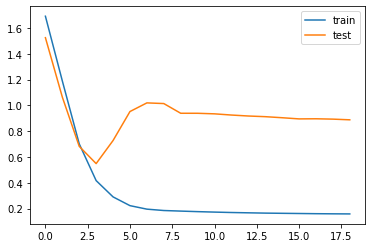

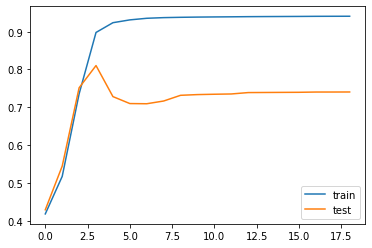

In [ ]:
[model, history] = train_bonnet()

#Training Segnet

In [55]:
[model, history] = train_segnet()

--------------------------------------------
Image heigth                      ---> 416
Image width                       ---> 608
Batch size                        ---> 10
Learning rate                     ---> 0.0005
Number of epochs                  ---> 100
Model checkpoint                  ---> True
Visualize tensorboars             ---> False
Early stopping                    ---> True
Reduce learning rate on plateau   ---> True
--------------------------------------------
Model: "functional_39"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 416, 608, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_24 (ZeroPadding2 (None, 422, 614, 3)  0           input_5[0][0]                   

ValueError: ignored

# Compute prediction

In [ ]:
apply_data_augmentation = True

img_h = 768
img_w = 1024

num_classes = 3

bs = 6

[img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)

[train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = img_h, img_w = img_w, bs = bs, num_classes = num_classes)

model = define_bonnet(input_size = (img_h, img_w, 3))


exps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')
model_name = 'bonnet_rect'
exp_dir = os.path.join(exps_dir, model_name)
ckpt_dir = os.path.join(exp_dir, 'ckpts')
latest = tf.train.latest_checkpoint(ckpt_dir)
print(latest)
model.load_weights(latest)

#model = compile_model(model, lr = lr)

In [ ]:
import time
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

iterator = iter(valid_dataset)

In [ ]:
image, target = next(iterator)

In [ ]:
image

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
fig.show()

image = image[0]
target = target[0, ..., 0]

out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

# Get predicted class as the index corresponding to the maximum value in the vector probability
# predicted_class = tf.cast(out_sigmoid > score_th, tf.int32)
# predicted_class = predicted_class[0, ..., 0]
predicted_class = tf.argmax(out_sigmoid, -1)

out_sigmoid.shape
print()

predicted_class = predicted_class[0, ...]

predicted_class.numpy

# Assign colors (just for visualization)
target_img = np.zeros([target.shape[0], target.shape[1], 3])
prediction_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
for i in range(1, 3):
  prediction_img[np.where(predicted_class == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(image))
ax[1].imshow(np.uint8(target_img))
ax[2].imshow(np.uint8(prediction_img))

fig.canvas.draw()
time.sleep(1)

**ResNet**


In [31]:
import keras
from keras.models import *
from keras.layers import *
from keras import layers

IMAGE_ORDERING = 'channels_last'

if IMAGE_ORDERING == 'channels_first':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.2/" \
                     "resnet50_weights_th_dim_ordering_th_kernels_notop.h5"
elif IMAGE_ORDERING == 'channels_last':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.2/" \
                     "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"


def one_side_pad(x):
    x = ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING)(x)
    if IMAGE_ORDERING == 'channels_first':
        x = Lambda(lambda x: x[:, :, :-1, :-1])(x)
    elif IMAGE_ORDERING == 'channels_last':
        x = Lambda(lambda x: x[:, :-1, :-1, :])(x)
    return x


def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at
                     main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters

    if IMAGE_ORDERING == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), data_format=IMAGE_ORDERING,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, data_format=IMAGE_ORDERING,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), data_format=IMAGE_ORDERING,
               name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor, kernel_size, filters, stage, block,
               strides=(2, 2)):
    """conv_block is the block that has a conv layer at shortcut
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at
                     main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    Note that from stage 3, the first conv layer at main path is with
    strides=(2,2) and the shortcut should have strides=(2,2) as well
    """
    filters1, filters2, filters3 = filters

    if IMAGE_ORDERING == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), data_format=IMAGE_ORDERING, strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, data_format=IMAGE_ORDERING,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), data_format=IMAGE_ORDERING,
               name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), data_format=IMAGE_ORDERING,
                      strides=strides, name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x


def get_resnet50_encoder(input_height=224,  input_width=224,
                         pretrained='imagenet',
                         include_top=True, weights='imagenet',
                         input_tensor=None, input_shape=None,
                         pooling=None,
                         classes=1000):

    assert input_height % 32 == 0
    assert input_width % 32 == 0

    if IMAGE_ORDERING == 'channels_first':
        img_input = Input(shape=(3, input_height, input_width))
    elif IMAGE_ORDERING == 'channels_last':
        img_input = Input(shape=(input_height, input_width, 3))

    if IMAGE_ORDERING == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    x = ZeroPadding2D((3, 3), data_format=IMAGE_ORDERING)(img_input)
    x = Conv2D(64, (7, 7), data_format=IMAGE_ORDERING,
               strides=(2, 2), name='conv1')(x)
    f1 = x

    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), data_format=IMAGE_ORDERING, strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')
    f2 = one_side_pad(x)

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')
    f3 = x

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')
    f4 = x

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
    f5 = x

    x = AveragePooling2D(
        (7, 7), data_format=IMAGE_ORDERING, name='avg_pool')(x)
    # f6 = x

    if pretrained == 'imagenet':
        weights_path = keras.utils.get_file(
            pretrained_url.split("/")[-1], pretrained_url)
        Model(img_input, x).load_weights(weights_path)

    return img_input, [f1, f2, f3, f4, f5]

def segnet_decoder(f, n_classes, n_up=3):

    assert n_up >= 2

    o = f
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(512, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(256, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    for _ in range(n_up-2):
        o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
        o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
        o = (Conv2D(128, (3, 3), padding='valid',
             data_format=IMAGE_ORDERING))(o)
        o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(64, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = Conv2D(n_classes, (3, 3), padding='same',
               data_format=IMAGE_ORDERING)(o)

    return o

def get_segmentation_model(input, output):

    img_input = input
    o = output

    o_shape = Model(img_input, o).output_shape
    i_shape = Model(img_input, o).input_shape

    if IMAGE_ORDERING == 'channels_first':
        output_height = o_shape[2]
        output_width = o_shape[3]
        input_height = i_shape[2]
        input_width = i_shape[3]
        n_classes = o_shape[1]
        o = (Reshape((-1, output_height*output_width)))(o)
        o = (Permute((2, 1)))(o)
    elif IMAGE_ORDERING == 'channels_last':
        output_height = o_shape[1]
        output_width = o_shape[2]
        input_height = i_shape[1]
        input_width = i_shape[2]
        n_classes = o_shape[3]
        o = (Reshape((output_height*output_width, -1)))(o)

    o = (Activation('softmax'))(o)
    model = Model(img_input, o)
    model.output_width = output_width
    model.output_height = output_height
    model.n_classes = n_classes
    model.input_height = input_height
    model.input_width = input_width
    model.model_name = ""
    return model

def _segnet(n_classes, encoder,  input_height=416, input_width=608,
            encoder_level=3):

    img_input, levels = encoder(
        input_height=input_height,  input_width=input_width)

    feat = levels[encoder_level]
    o = segnet_decoder(feat, n_classes, n_up=3)
    model = get_segmentation_model(img_input, o)

    return model


def resnet50_segnet(n_classes, input_height=416, input_width=608,
                    encoder_level=3):

    model = _segnet(n_classes, get_resnet50_encoder, input_height=input_height,
                    input_width=input_width, encoder_level=encoder_level)
    model.model_name = "resnet50_segnet"
  
    return model

In [37]:
[model, history] = train_segnet()

--------------------------------------------
Image heigth                      ---> 416
Image width                       ---> 608
Batch size                        ---> 10
Learning rate                     ---> 0.0005
Number of epochs                  ---> 100
Model checkpoint                  ---> True
Visualize tensorboars             ---> False
Early stopping                    ---> True
Reduce learning rate on plateau   ---> True
--------------------------------------------
Epoch 1/100


ValueError: ignored

# Execution

# Result csv

In [ ]:
def rle_encode(img):
  '''
  img: numpy array, 1 - foreground, 0 - background
  Returns run length as string formatted
  '''
  pixels = img.flatten()
  pixels = np.concatenate([[0], pixels, [0]])
  runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
  runs[1::2] -= runs[::2]
  
  return ' '.join(str(x) for x in runs)

In [ ]:
import os
import json
import numpy as np
from PIL import Image

    # The submission file will be a zip file containing the a
    # submission.json file.

    # It must have the following structure:

    # - image name (without any extension, e.g., png, jpg, etc.)
    #   - shape: shape of the original image as list [Height, Width]
    #   - team: team of the original image. One in {'Bipbip', 'Pead', 'Roseau', 'Weedelec'}
    #   - crop: crop of the original image. One in {'Haricot', 'Mais'}
    #   - segmentation: prediction (as a dict)
    #     - crop: RLE encoded crop segmentation (no weed)
    #     - weed: RLE encoded weed segmentation (no crop)

    # Please refer to the folder structure of the given dataset to fill
    # the team and crop keys.

teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
plants = ['Haricot', 'Mais']

submission_dict = {}

for t in teams:
  for p in plants:

    tmp_path = '/content/Development_Dataset/Test_Dev/' + t + '/' + p + '/' + 'Images'
    
    image_filenames = os.listdir(tmp_path)

    for img_name in image_filenames:
      
      tmp_path = '/content/Development_Dataset/Test_Dev/' + t + '/' + p + '/' + 'Images'
      tmp_path = os.path.join(tmp_path, img_name)
      img = Image.open(tmp_path).convert('RGB')

      img_name = img_name.split('.')[0]

      submission_dict[img_name] = {}
      submission_dict[img_name]['shape'] = [img.height, img.width]
      submission_dict[img_name]['team'] = t
      submission_dict[img_name]['crop'] = p
      submission_dict[img_name]['segmentation'] = {}

      #img = img.resize((img_h, img_w)) # ??????????????????????????????????????????????????????????????????

      img_array = np.array(img)
      img_array = np.expand_dims(img_array, 0) # insert batch dimension

      # Data Normalization ----------------------------------------------
      img_array = img_array

      # Prediction from the model
      out = model.predict(x=img_array)

      mask_arr = tf.argmax(out, -1)
      mask_arr = mask_arr.numpy()

      # RLE encoding
      # crop
      rle_encoded_crop = rle_encode(mask_arr == 1)
      # weed
      rle_encoded_weed = rle_encode(mask_arr == 2)

      submission_dict[img_name]['segmentation']['crop'] = rle_encoded_crop
      submission_dict[img_name]['segmentation']['weed'] = rle_encoded_weed

# Finally, save the results into the submission.json file
with open('/content/submission.json', 'w') as f:
  json.dump(submission_dict, f)

! mkdir '/content/drive/My Drive/Challenge_2/submission'
! cp '/content/submission.json' '/content/drive/My Drive/Challenge_2/submission/submission.json' 

In [ ]:
! ls '/content/drive/My Drive/Challenge_2/submission'

In [ ]:
# ---------------------------------------
# Save the model trained with fine tuning
# ---------------------------------------
#! mkdir '/content/drive/My Drive/Challenge_1/model'
#! mkdir '/content/drive/My Drive/Challenge_1/model/EffNet_B7_dense_16_NOdropout_fine_tuning_block5-6-7'
#model.save('/content/drive/My Drive/Challenge_1/model/EffNet_B7_dense_16_NOdropout_fine_tuning_block5-6-7')

In [ ]:
'''
Script to check dimension of the images

# -----------------------------------------------
teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
plants = ['Haricot', 'Mais']

submission_dict = {}

for t in teams:
  for p in plants:
    tmp_path = '/content/Development_Dataset/Test_Dev/' + t + '/' + p + '/' + 'Images'
    image_filenames = os.listdir(tmp_path)

    for img_name in image_filenames:

      tmp_path = '/content/Development_Dataset/Test_Dev/' + t + '/' + p + '/' + 'Images'
      tmp_path = os.path.join(tmp_path, str(img_name))
      
      img = Image.open(tmp_path).convert('RGB')
      img_array = np.array(img)

      img_name = img_name.split('.')[0]

      submission_dict[img_name] = {}
      submission_dict[img_name]['shape'] = img_array.shape
      submission_dict[img_name]['team'] = t
      submission_dict[img_name]['crop'] = p

# -----------------------------------------------------------------------
submission
'''